# Lab 1

## Lab Group: SDAB
## Team Members
<ul>
    <li> Arjun Kumaresh (U2221225J)</li>
    <li> Ronald Teo Boon Keat (U2220156E)</li>
    <li> Liau Zheng Wei (U2222032K)</li>

### Work Allocation
> **Ronald** - Helped train the RL agent for 40000 episodes. Researched on RL techniques. Helped write code for tasks 1,2 and 3 <br>
> **Arjun** - Helped train the RL agent for 40000 episodes. Researched on RL techniques. Helped write code for tasks 1,2 and 3 <br>
> **Zheng Wei** - Help trained the RL agent for 40000 episodes. Researched on RL techniques. Helped write code for tasks 1,2 and 3 <br>

**Installation of dependencies**

In [1]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.


The system cannot find the path specified.
The system cannot find the path specified.


The system cannot find the path specified.


<hr>

# **Q Learning Algorithm**


For the task, a q-learning agent was used to find the optimal policy within the environment.

### **What is Q learning?**
> Q learning is a reinforcement learning technique used for finding the optimal policy for an environment. When a q-learning agent interacts with the environment, it takes an action from a set of different possibilities and receives either a positive reward (a good outcome) or a negative reward (a poor outcome). In the case of q-learning, a q table is used to store q values, which represent the expected future rewards that an agent can obtain after taking an action to progress to a certain state. The q values are calculated based on the following formula:

```
Q(s,a)(New Q value)<--Q(s,a)(Old Q value)+ α(r+γ*max(Q(s',a'))-Q(s,a))
```



Saving testimage.png to testimage.png


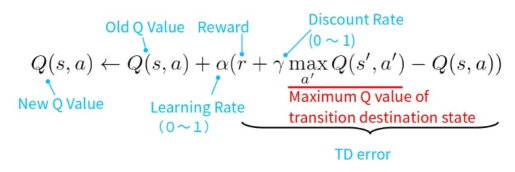

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload the image file
uploaded = files.upload()

# Loop through the uploaded files and display them
for filename in uploaded.keys():
    # Load and display the image
    img = mpimg.imread(filename)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.show()

### **Alpha**

> Represents the learning rate which determines how much the agent adjusts
its q values based on new information. A higher q value means more adjustment based on new information leading to faster updates to Q values but may lead to a poor solution while a lower q value means lesser adjustment to new q values, leading to slower updates to q values but a more stable and possibly converge to a better solution.


### **Gamma**

> Represents the discount factor, which determines how much importance to give to future rewards. Higher gamma means more importance is given and vice versa. **R(s,a)** is the immediate reward after taking action a in state s. **max(Q(s’,a’))** determines the maximum expected future reward obtainable from a new state **s’**, considering all possible actions **a’** that the agent can take in that state.


### **Epsilon**

> An important part of the Q-learning agent is the balance between exploration(trying new actions to discover potentially better options in the environment) and exploitation(exploiting current knowledge to choose actions). Therefore, a greedy epsilon strategy is also used within the agent where probability epsilon represents prioritising exploration and choosing a random q value from the q table and probability 1-epsilon represents prioritising exploitation and choosing the highest q value from the q table.


### **Reasons Q-learning was adopted:**
> The need for discretisation of the state space and action space within the cartpole environment. Due to the continuous nature of observations, there is a need to discretise the observation values. Given the relatively small nature of the state space and action space, in such a case using more complex RL agents such as DQN and policy gradient methods may be unsuitable due to the complex nature of neural networks in the case of DQN and the more complex reward structure in policy gradient methods as compared to Q-learning’s relatively simpler and easier to understand reward structure.

> Moreover Q-learning directly updates Q values in the Q table based on received rewards and penalties. This makes it highly suitable for the reward-centric nature of the cartpole environment and the given task at hand.



In [60]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
import time
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

In [61]:
env = gym.make("CartPole-v1")

# number of available actions
print("Number of available actions: ", env.action_space, "\n")

# print the limits
print("Limits:", env.observation_space, "\n")

# sets a random initial state
observation = env.reset()

# return value = [cart position, cart velocity, pole angle of rotation, angular velocity]
print("Initial observations:", observation, "\n")

Number of available actions:  Discrete(2) 

Limits: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32) 

Initial observations: (array([ 0.02097432, -0.00267297,  0.02304072, -0.03001328], dtype=float32), {}) 



In [62]:
#For discretization
numberOfBins = [30,30,50,50]
cartPositionBin=np.linspace(-4.8,4.8,numberOfBins[0])
cartVelocityBin=np.linspace(-4,4,numberOfBins[1])
poleAngleBin=np.linspace(-0.418,0.418,numberOfBins[2])
poleAngleVelocityBin=np.linspace(-4,4,numberOfBins[3])

# Function to get the discrete state from the continuous state values
def getStateIndex(state):
    indexPosition=np.digitize(state[0],cartPositionBin)-1
    indexVelocity=np.digitize(state[1],cartVelocityBin)-1
    indexAngle=np.digitize(state[2],poleAngleBin)-1
    indexAngularVelocity=np.digitize(state[3],poleAngleVelocityBin)-1

    return tuple([indexPosition,indexVelocity,indexAngle,indexAngularVelocity])

In [108]:
# Function to select the action based on discrete state value
def selectAction(state,epsilon):
        randomNumber = np.random.random()

        if randomNumber < epsilon:
          # returns a random action selected from: 0,1,...,actionNumber-1
            return np.random.choice(env.action_space.n)

        # otherwise, we are selecting greedy actions
        else:
          # we return the index where Qmatrix[state,:] has the max value
          # that is, since the index denotes an action, we select greedy actions
            return np.argmax(q_matrix[getStateIndex(state)])

In [113]:
# Function to train the RL agent
def agent(env, learning_rate, discount_rate, episodes, epsilon, epsilon_decay, q_matrix):
        episodeRewards = []

        for episode in range(episodes):
            observation = env.reset()[0]
            cumulative_reward = 0
            done = False

            while not done and cumulative_reward < 500:
                #Convert to discrete state
                initial_discrete_state = getStateIndex(observation)

                #Select the action
                actionChoice = selectAction(observation, epsilon)

                #Get observation of S'
                observation, reward, done, _, info,  = env.step(actionChoice)

                #Increment reward
                cumulative_reward += reward

                #Convert S' to discrete state
                prime_discrete_state = getStateIndex(observation)

                #Updating the Q-table using the Q-learning update rule
                new_q = q_matrix[initial_discrete_state][actionChoice] + learning_rate * (reward + discount_rate * np.max(q_matrix[prime_discrete_state]) -  q_matrix[initial_discrete_state][actionChoice])
                q_matrix[initial_discrete_state][actionChoice] = new_q

            #Decrement the epsilon upon greater than the criteria set up.
            if epsilon > 0.01 and len(episodeRewards) > 0 and cumulative_reward > np.mean(episodeRewards[-1000:]):
                epsilon *= (1-epsilon_decay)

            #Print the epsilon and cumulative mean every 2000 episodes
            if episode % 2000 == 0 and episode != 0:
                print("Episode",episode+1)
                print("Epsilon:",epsilon)
                print("Cumulative Mean Reward", ":", np.mean(episodeRewards),"\n")

            #Store the reward for this episode
            episodeRewards.append(cumulative_reward)

        return q_matrix, episodeRewards



Episode 2001
Epsilon: 0.624616345939778
Cumulative Mean Reward : 29.039 

Episode 4001
Epsilon: 0.36086374305909624
Cumulative Mean Reward : 46.297 

Episode 6001
Epsilon: 0.22338137869394903
Cumulative Mean Reward : 62.273833333333336 

Episode 8001
Epsilon: 0.13398833400022772
Cumulative Mean Reward : 80.702625 

Episode 10001
Epsilon: 0.08465955241257864
Cumulative Mean Reward : 101.9695 

Episode 12001
Epsilon: 0.05093299298690677
Cumulative Mean Reward : 134.663 

Episode 14001
Epsilon: 0.028271768628847265
Cumulative Mean Reward : 169.07407142857141 

Episode 16001
Epsilon: 0.015198679590913896
Cumulative Mean Reward : 196.5301875 

Episode 18001
Epsilon: 0.009995187929535779
Cumulative Mean Reward : 225.28255555555555 

Episode 20001
Epsilon: 0.009995187929535779
Cumulative Mean Reward : 239.35145 

Episode 22001
Epsilon: 0.009995187929535779
Cumulative Mean Reward : 257.88890909090907 

Episode 24001
Epsilon: 0.009995187929535779
Cumulative Mean Reward : 267.9127916666667 

Epi

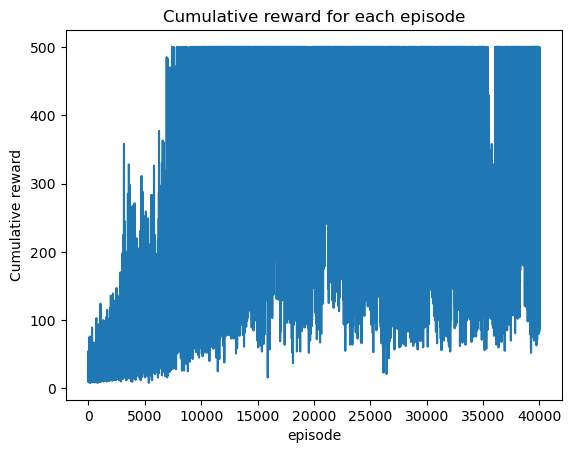

In [114]:
# Setting up the Q matrix
q_matrix = np.random.uniform(low=0, high=1, size=(numberOfBins[0],numberOfBins[1],numberOfBins[2],numberOfBins[3],2))

# Setting the parameter values for agent function
epsilon = 1
discount_rate = 0.95 #Discount Rate
learning_rate = 0.15 #Learning Rate
episodes = 40000
epsilon_decay = 0.0005

# Train the RL agent
q_matrix, episodeRewards = agent(env, learning_rate, discount_rate, episodes, epsilon, epsilon_decay, q_matrix)

plt.plot(episodeRewards)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

# Task 1


#### To develop the RL agent, we realised that we should train it. This was done with Q learning as described above.

In the <strong>agent(env, learning_rate, discount_rate, episodes, epsilon, epsilon_decay, q_matrix)</strong> function:

> The function <strong>getStateIndex(state)</strong> is used to discretise the continuous state space into discrete bins, using the np.digitize() function to find the index of the bin to which each state variable belongs. This is done after creating arrays of each state variable using np.linspace() which generates evenly spaced numbers over a specified interval and number of bins.

> The function <strong>selectAction(state, index, epsilon)</strong> is developed to determine if the RL agent is to explore states through random action or to perform greedy actions. The former occurs when a random number generated is less than the epsilon value defined, while the latter occurs when the random number is greater or equal to the epsilon value.

> The observation of the next state and reward are found through observation, reward, done, info = env.step(actionChoice). Then the new state is discretized and the cumulative reward is calculated.

> We then updated the Q table with the Q learning formula by using parameters alpha as the learning rate and gamma as the discount factor. Afterwhich, the epsilon value is decremented if it is greater than 0.01 and the cumulative reward of current epsiode is larger than the average cumulative reward for the last 1000 episode rewards. The list of episode rewards is then updated with the cumulative reward for that episode before a new episode begins. This was how the RL agent was trained using 40,000 episodes.

Finally, we used a random state from the cart pole environment and derive a optimal action based on the trained Q table (shown below).


In [115]:
observation = env.reset()[0]
discrete_state = getStateIndex(observation)

#Get the optimal action based on current discrete state
actionChoice = np.argmax(q_matrix[discrete_state])

#Get observation of S'
observation, reward, done, _, info= env.step(actionChoice)

print("Obeservation:", observation)
print("Chosen Action:", actionChoice)

Obeservation: [ 0.03129614 -0.16507763 -0.02588695  0.2933048 ]
Chosen Action: 0


# Task 2
Here, we used the previously trained RL agent model to test it on the Cart Pole environment.
To better visualise the effectiveness of the RL agent, we plotted a graph of Cumulative Mean Reward against the Number of Episodes for 100 episodes. To demonstrate that our agent is satisfactory, we made sure that the Cumulative Mean Reward after 100 episodes was >195


Episode 1 Cumulative Mean Reward : 500.0
Episode 11 Cumulative Mean Reward : 489.27272727272725
Episode 21 Cumulative Mean Reward : 472.23809523809524
Episode 31 Cumulative Mean Reward : 471.4516129032258
Episode 41 Cumulative Mean Reward : 444.6829268292683
Episode 51 Cumulative Mean Reward : 448.70588235294116
Episode 61 Cumulative Mean Reward : 438.62295081967216
Episode 71 Cumulative Mean Reward : 437.16901408450707
Episode 81 Cumulative Mean Reward : 441.75308641975306
Episode 91 Cumulative Mean Reward : 446.83516483516485
Episode 100 Cumulative Mean Reward : 445.75


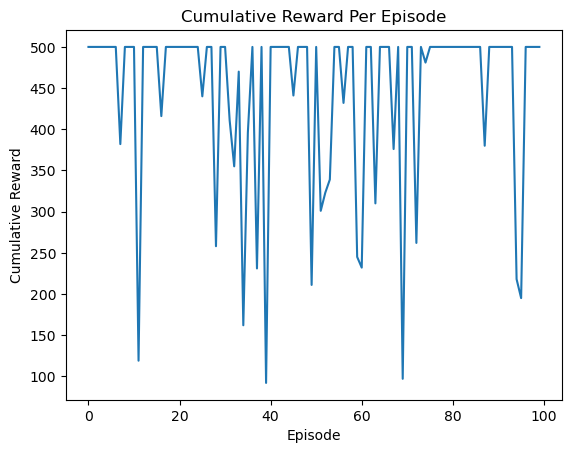

In [141]:
test_reward = []

#Testing for 100 episode with optimal Q-table
for i in range(100):
    epsilon = 1
    observation = env.reset()[0]
    cumulative_reward = 0
    done = False

    while not done:
        #Convert to discrete state
        initial_discrete_state = getStateIndex(observation)

        #Get the optimal action based on current discrete state
        actionChoice = np.argmax(q_matrix[getStateIndex(observation)])
        #Get observation of S'
        observation, reward, done, _, info= env.step(actionChoice)
        #Increment reward
        cumulative_reward += reward
        
        if cumulative_reward == 500:
            done = True

    test_reward.append(cumulative_reward)
    if (i % 10 == 0) or i == 99:
        print("Episode",i+1,"Cumulative Mean Reward", ":", np.mean(test_reward))

# Need to still include episode results for 100 epsiodes
plt.plot(test_reward)
plt.title('Cumulative Reward Per Episode')
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.show()


# Task 3


Our agent has significantly surpassed the average reward benchmark of 195, indicating its ability to learn and adapt to the environment, keeping the pole balanced over extended periods (based on the video below).

In [117]:
env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()[0]
cumulative_reward = 0
discrete_state = getStateIndex(observation)
done = False

while not done:
    env.render()

    #Get the optimal action based on current discrete state
    actionChoice = np.argmax(q_matrix[discrete_state])

    #Get observation of S'
    observation, reward, done, _, info= env.step(actionChoice)

    discrete_state = getStateIndex(observation)
    #Increment reward
    cumulative_reward += reward
    
    if cumulative_reward == 500:
        done = True

print("Reward for this episode:",cumulative_reward)
env.close()
show_video()

Reward for this episode: 500.0


Furthermore, high average rewards over 100 episodes justify that the agent is stable and consistent in applying the learned strategy. Hence, the success of our Q-learning agent in the CartPole-v1 environment is a testament to the robust learning effectiveness of this classical algorithm, policy efficiency, and it’s potential applicability to more complicated challenges in the real-world.